In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

In [0]:
!pwd

/content


In [0]:
path = Path('/content/gdrive/My Drive/Dataset_chromakeying/background_removal_dataset/dataset')
path

PosixPath('/content/gdrive/My Drive/Dataset_chromakeying/background_removal_dataset/dataset')

In [0]:
# fnames = get_image_files(path/'bg_composite/')
fnames = get_image_files(path/'image')
len(fnames)

537

In [0]:
# lbl_names = get_image_files(path/'bg_mask')
lbl_names = get_image_files(path/'label')
lbl_names[:3]

[PosixPath('/content/gdrive/My Drive/Dataset_chromakeying/background_removal_dataset/dataset/label/axis_017.png'),
 PosixPath('/content/gdrive/My Drive/Dataset_chromakeying/background_removal_dataset/dataset/label/em_01_004.png'),
 PosixPath('/content/gdrive/My Drive/Dataset_chromakeying/background_removal_dataset/dataset/label/bearing_box_ax01_010.png')]

In [0]:
lname=r'[a-z]+[\_a-z0-9A-Z]+[0-9]+[a-z0-9\-]+'
tester='/content/gdrive/My Drive/final_asus/semantic_labels/m20_100_B_022.png'
m=re.search(lname,tester)
print(m)
s=m[0]+'.png'
s

<_sre.SRE_Match object; span=(52, 65), match='m20_100_B_022'>


'm20_100_B_022.png'

In [0]:
import re
def get_y_fn(x):
  print(x)
  lname=r'[a-z]+[\_a-z0-9A-Z]+[0-9]+[a-z0-9\-]+'
#   print(Path(str(path)+'/semantic_labels/'))
  matcher=re.search(lname,str(x))
  s=matcher[0]+'.png'
  print(Path(str(path)+'/label')/s)
  return (Path(str(path)+'/label')/s)
# codes = array(['axis', 'bearing', 'bearing_box_AX01', 'bearing_box_AX16', 'container_blue', 'container_red',
#     'distance_tube', 'F20_20_B', 'F20_20_G', 'M20', 'M20_100', 'M30','motor','R20','S40_40_B','S40_40_G','em_01','em_02','Void'])
codes=array(['foreground','background','Void'])
codes.shape

(3,)

In [0]:
ckgrou

In [0]:
import numpy as np
row_label='axis'
labeller=np.array(['axis', 'bearing', 'bearing_box_AX01', 'bearing_box_AX16', 'container_blue', 'container_red','distance_tube', 'F20_20_B', 'F20_20_G', 'M20', 'M20_100', 'M30','motor','R20','S40_40_B','S40_40_G','em_01','em_02'])
k=np.argwhere(labeller==row_label)[0][0]
print(k)

0


In [0]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

torch.Size([3, 480, 640])

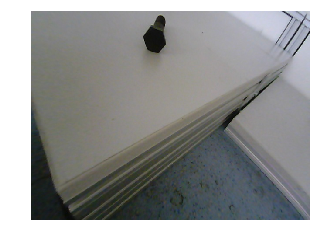

In [0]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))
img.shape

/content/gdrive/My Drive/Dataset_chromakeying/background_removal_dataset/dataset/image/m20_100_022.jpg
/content/gdrive/My Drive/Dataset_chromakeying/background_removal_dataset/dataset/label/m20_100_022.png


torch.Size([1, 480, 640])

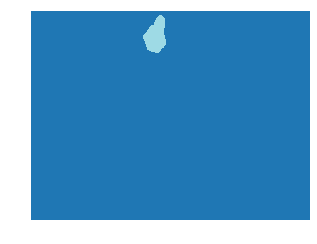

In [0]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)
mask.shape

In [0]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([480, 640]), tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [0]:
bs,size = 2,src_size//2

In [0]:
# src = (SegmentationItemList.from_folder(path).
#        split_by_rand_pct(valid_pct=0.2).
#        label_from_func(get_y_fn, classes=codes));
src = (SegmentationItemList.from_folder(path).
       split_by_rand_pct(valid_pct=0.2).
       label_from_func(get_y_fn,classes=codes));

In [0]:
data = (src.transform(get_transforms(), tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

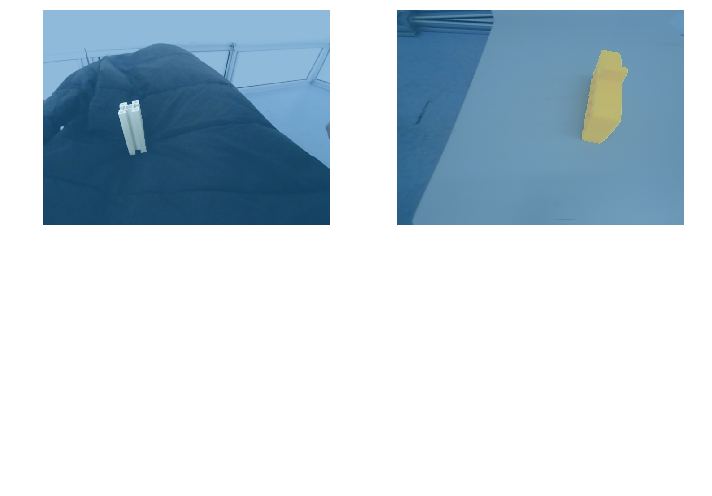

In [0]:
data.show_batch(2, figsize=(10,7))

In [0]:
# metrics=accuracy
wd=1e-2

In [0]:
learn = unet_learner(data, models.resnet34, metrics=acc_camvid, wd=wd,bottle=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 26344997.95it/s]


In [0]:
data.classes

array(['foreground', 'background', 'Void'], dtype='<U10')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


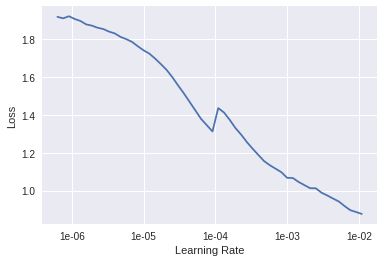

In [0]:
lr_find(learn)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,acc_camvid,time
0,0.056312,0.126155,0.935294,12:14


In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-4/100,1e-4))

epoch,train_loss,valid_loss,acc_camvid,time
0,0.044463,0.041183,0.994027,12:05
1,0.036377,0.040294,0.985927,12:05
2,0.038435,0.024065,0.992967,12:07
3,0.018722,0.022099,0.994222,12:06


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

In [0]:
learn.load('stage-1');

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(6,max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,acc_camvid,time
0,0.310786,0.539118,0.886845,07:42
1,0.363607,0.607523,0.864892,07:42
2,0.313543,0.706180,0.890439,07:40
3,0.323195,1.696285,0.518562,07:37
4,0.307234,0.463073,0.870814,07:41
5,0.253205,0.536242,0.887539,07:42


In [0]:
learn.fit_one_cycle(1, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,acc_camvid,time
0,0.094150,0.109576,0.964668,07:59


In [0]:
learn.export()
defaults.device = torch.device('cpu')

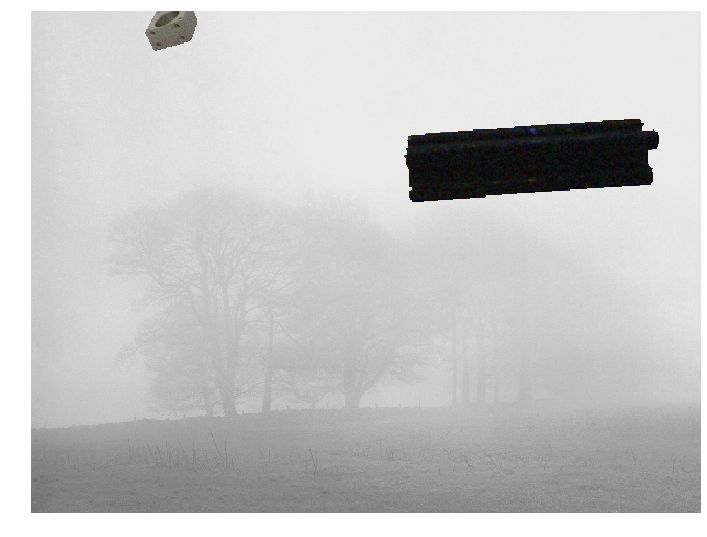

In [0]:
img=open_image(path/'00002.jpg')
img.show(figsize=(12,12))

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)

In [0]:
print(pred_class)

ImageSegment (1, 480, 640)


In [0]:
print(outputs)

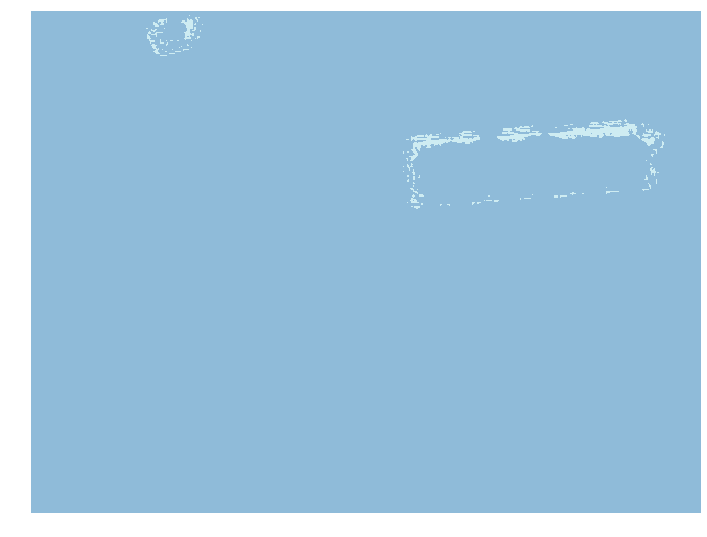

In [0]:
pred_class.show(figsize=(12,12))

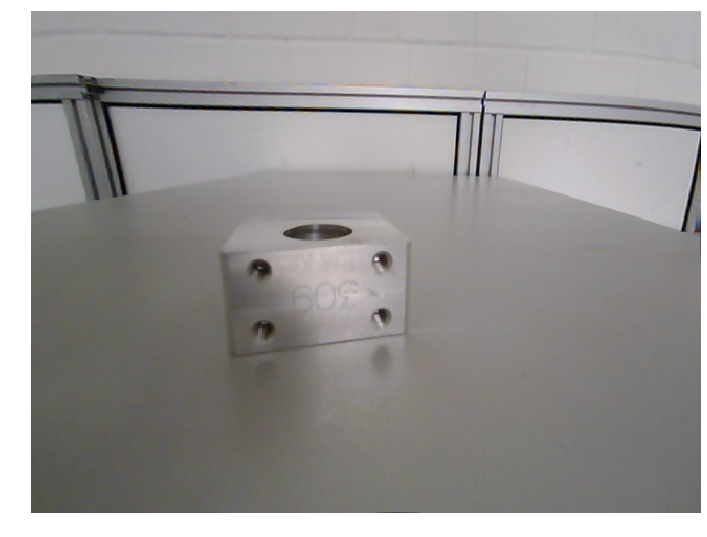

In [0]:
img=open_image(path/'bearing_box_ax01_005.jpg')
img.show(figsize=(12,12))

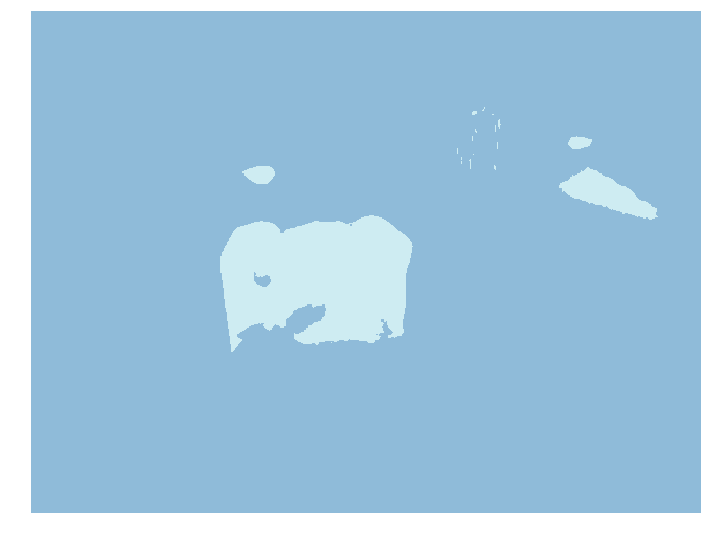

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.show(figsize=(12,12))